1.UNDERSTANDING THE PROBLEM AND DATA

**PROBLEM**
The problem trying to solve here is the credit card fraudulent activities.
The dataset provided is also heavily imbalanced so our work also aims to solve the imbalance in it and to build a good classification model.


**THE DATA**
Data provided consists of 31 columns which can be splitted into 30 features and 1 target


**FEATURES**


**Time**--->It depicts the time slot of the particular transaction


**V1-V28**--->Anonymous values which can be done for high dimensionality reduction


**Amount**--->Depicts the amount which is transacted


**TARGET**


**Class**--->The class which has fraudulent and non-fraudulent classes  

ESSENTIAL LIBRARIES TO BE IMPORTED

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVR





READING THE CSV DATA

In [4]:
data = pd.read_csv('creditcard.csv')
print(data.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

GETTING THE NAME OF COLUMNS

In [3]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

CHECKING FOR SHAPE

In [5]:
 data.shape

(1986, 31)

GETTING THE DATA TYPE AND THE NUMBER OF NON-NULL DATA OF EACH COLUMN IN DATASET

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

SOME DESCRIPTIVE STATS OVER HERE

In [37]:
print(data.describe())

              Time           V1           V2           V3           V4  \
count  3973.000000  3973.000000  3973.000000  3973.000000  3973.000000   
mean   1638.724138    -0.333723     0.308691     0.837062     0.013144   
std    1016.577498     1.351976     1.180436     0.981057     1.418751   
min       0.000000   -12.168192   -15.732974   -12.389545    -4.657545   
25%     750.000000    -1.030747    -0.155734     0.287224    -0.908469   
50%    1526.000000    -0.451819     0.409641     0.884503     0.099497   
75%    2526.000000     1.070572     0.921588     1.433851     0.982710   
max    3624.000000     1.685314     6.118940     4.017561     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  3973.000000  3973.000000  3973.000000  3973.000000  3973.000000  ...   
mean     -0.029177     0.052836     0.146895    -0.071352     0.055778  ...   
std       1.207632     1.286610     1.090769     1.294647     0.919087  ...   
min     -32.09212

2.DATA CLEANING

CHECKING FOR THE THE NULL VALUES IN DATASET

In [6]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

SETTING UP THE NULL VALUES

In [7]:
data.fillna(0, inplace=True)

CHECKING FOR THE NULL VALUES

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3.DATA VISUALISATIONS FOLLOWED HERE

UNDERSTANDING HOW TIME INFLUENCES THE FRADULENT ACTIVITIES

In [9]:
fraud_data = data[data['Class'] == 1]

fig = go.Figure()

fig.add_trace(go.Histogram(x=fraud_data['Time'], nbinsx=50, histnorm='probability density', marker=dict(color='#1f77b4'), opacity=0.75))

fig.update_layout(
    title='Distribution of Fraudulent Transactions Over Time',
    xaxis_title='Time',
    yaxis_title='Probability Density',
    showlegend=False,
    bargap=0.05
)

fig.show()



INFERENCE:Between the values of 406,472  the fradulent activities rates are higher

In [10]:
correlation_matrix = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27','V28', 'Class']].corr()

correlation_with_class = correlation_matrix['Class'].drop('Class')

# Sort in descending order
correlation_with_class_sorted = correlation_with_class.sort_values(ascending=False)

# Print or display the sorted correlation values
print(correlation_with_class_sorted)


V4     0.075120
V20    0.058829
V23    0.044864
V18    0.043739
V11    0.041126
V15    0.035536
V21    0.029231
V8     0.023682
V22    0.018602
V5     0.012385
V19    0.011730
V13    0.006470
V25    0.004193
V24   -0.000035
V27   -0.001977
V26   -0.002318
V16   -0.005256
V28   -0.006023
V2    -0.024181
V6    -0.032298
V7    -0.034640
V3    -0.034770
V17   -0.048283
V9    -0.054033
V1    -0.056164
V10   -0.059572
V12   -0.095667
V14   -0.117210
Name: Class, dtype: float64


**V FEATURE-->**IS ACTUALLY A ANONYMOUS FEATURE WHICH IS DONE FOR DIMENSIONALITY REDUCTION

 **HIGHLY POSITIVE CORRELATED** AMONG V FEATURES IS THE V4 FEATURE

**HIGHLY NEAGATIVE CORRELATED** AMONG V FEATURES IS THE V14 FEATURE

In [11]:



fig = px.histogram(data[data['Class'] == 1], x='Amount', nbins=50, title='Distribution of Fraudulent Transactions Over Time')
fig.update_layout(xaxis_title='Amount', yaxis_title='Number of Fraudulent Transactions', showlegend=False)
fig.show()


WHEN THE AMOUNT IS 529 THE FRADULENT ACTIVITIES ARE HIGHER

In [12]:


fig = px.histogram(data, x='Class', color='Class', labels={'Class': 'Transaction Class'},
                   title='Distribution of Transaction Classes',
                   category_orders={'Class': [0, 1]},
                   opacity=0.7)

fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    showlegend=False
)

fig.show()


4.PREPROCESSING THE DATA FOR MACHINE LEARNING

SO THE DATA IS HIGHLY IMBALANCED

SO NOW LETS APPLY SMOTE TECHNIQUE WHICH WILL RESOLVE THIS IMBALANCE INSIDE THE DATASET

SEPARATING FEATURES AND TARGET

In [13]:
X = data.drop(['Class'], axis=1)
y = data['Class']

APPLYING SMOTE AND THEN VISUALISING HOW ACTUALLY IT WORKS

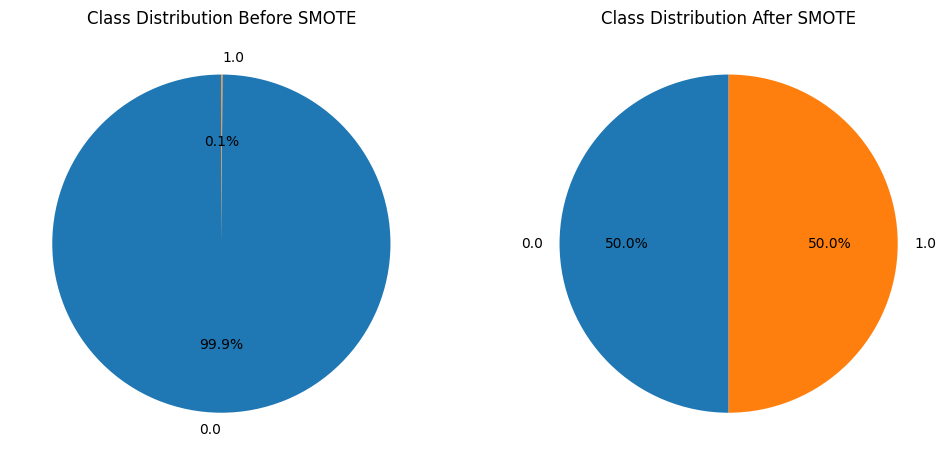

In [14]:


# Assuming X represents the features, and y represents the target variable (fraud or non-fraud)

# Before applying SMOTE
y_before_smote = pd.Series(y)
class_counts_before = y_before_smote.value_counts()

# After applying SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_after_smote = pd.Series(y_resampled)
class_counts_after = y_after_smote.value_counts()

# Plotting the pie charts
labels_before = class_counts_before.index
counts_before = class_counts_before.values

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(counts_before, labels=labels_before, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before SMOTE')

labels_after = class_counts_after.index
counts_after = class_counts_after.values

plt.subplot(1, 2, 2)
plt.pie(counts_after, labels=labels_after, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After SMOTE')

plt.show()


APPLYING PCA

In [15]:

pca = PCA()

X_pca = pca.fit_transform(X_resampled)

SCALING THE DATA

In [16]:
scaler = StandardScaler()
X_sca = scaler.fit_transform(X_pca)

SPLITTING THE DATA FOR TRAINING AND TESTING

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_sca, y_resampled, test_size=0.2, random_state=42)

5.TRYING OUT ALL MACHINE LEARNNG MODELS

APPLYING LOGISTIC REGRESSION

In [18]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression:
[[418   2]
 [  0 374]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       0.99      1.00      1.00       374

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794

Accuracy: 0.9974811083123426


APPLYING SUPPORT VECTOR CLASSIFIER

In [19]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluate SVC
print("Support Vector Classifier:")
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Support Vector Classifier:
[[420   0]
 [  0 374]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       1.00      1.00      1.00       374

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794

Accuracy: 1.0


DECISION TREE CLASSIFIER

In [20]:

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier:
[[420   0]
 [  0 374]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       1.00      1.00      1.00       374

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794

Accuracy: 1.0


RANDOM FOREST CLASSIFIER

In [21]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("="*40)

Random Forest Classifier:
[[420   0]
 [  0 374]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       1.00      1.00      1.00       374

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794

Accuracy: 1.0


Naive Bayes Classifier

In [22]:
# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate Naive Bayes Classifier
print("Naive Bayes Classifier:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("="*40)

Naive Bayes Classifier:
[[420   0]
 [  0 374]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       1.00      1.00      1.00       374

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794

Accuracy: 1.0


K-Nearest Neighbors Classifier

In [23]:






# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate K-Nearest Neighbors Classifier
print("K-Nearest Neighbors Classifier:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("="*40)


K-Nearest Neighbors Classifier:
[[420   0]
 [  0 374]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       1.00      1.00      1.00       374

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794

Accuracy: 1.0


AS I RECIEVED 100 PERCENT ACCURACY I DIDNT MAKE ANY TRY TO REMOVE FEATURES

BY APPLYING THIS DATSET TO THE VARIOUS MODELS I RECIEVED 100 PERCENT ACCURACY OVER THE MODELS AS FOLLOWS:
1.Support Vector Classifier

2.Decision Tree Classifier

2.Random Forest Classifier

3.Naive Bayes Classifier

4.K-Nearest Neighbors Classifier

6.CROSS VALIDATION AND CHOOSING THE BEST MODEL

In [25]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)



lr_scores = cross_val_score(log_reg, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Mean Accuracy:", np.mean(lr_scores))
print("="*40)

Logistic Regression Cross-Validation Scores: [1.         0.99496222 0.99496222 1.         0.99748111]
Mean Accuracy: 0.9974811083123425


In [24]:
dt_scores = cross_val_score(dt_classifier, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Decision Tree Classifier Cross-Validation Scores:", dt_scores)
print("Mean Accuracy:", np.mean(dt_scores))
print("="*40)

Decision Tree Classifier Cross-Validation Scores: [1.         1.         0.99748111 1.         0.99748111]
Mean Accuracy: 0.9989924433249371


In [26]:
svc_scores = cross_val_score(svc, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Support Vector Classifier Cross-Validation Scores:", svc_scores)
print("Mean Accuracy:", np.mean(svc_scores))
print("="*40)


Support Vector Classifier Cross-Validation Scores: [1.         1.         0.99748111 1.         0.99748111]
Mean Accuracy: 0.9989924433249371


In [27]:
dt_scores = cross_val_score(dt_classifier, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Decision Tree Classifier Cross-Validation Scores:", dt_scores)
print("Mean Accuracy:", np.mean(dt_scores))

Decision Tree Classifier Cross-Validation Scores: [1.         1.         0.99748111 1.         0.99748111]
Mean Accuracy: 0.9989924433249371


In [28]:
rf_scores = cross_val_score(rf_classifier, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))

Random Forest Cross-Validation Scores: [1.         1.         0.99748111 1.         0.99748111]
Mean Accuracy: 0.9989924433249371


In [29]:
nb_scores = cross_val_score(nb_classifier, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Naive Bayes Cross-Validation Scores:", nb_scores)
print("Mean Accuracy:", np.mean(nb_scores))

Naive Bayes Cross-Validation Scores: [1.         1.         0.99748111 1.         0.99748111]
Mean Accuracy: 0.9989924433249371


In [30]:
knn_scores = cross_val_score(knn_classifier, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("K-Nearest Neighbors Cross-Validation Scores:", knn_scores)
print("Mean Accuracy:", np.mean(knn_scores))

K-Nearest Neighbors Cross-Validation Scores: [1.         1.         0.99748111 1.         0.99748111]
Mean Accuracy: 0.9989924433249371


7.FEATURE IMPORTANCE OF THE BEST MODEL

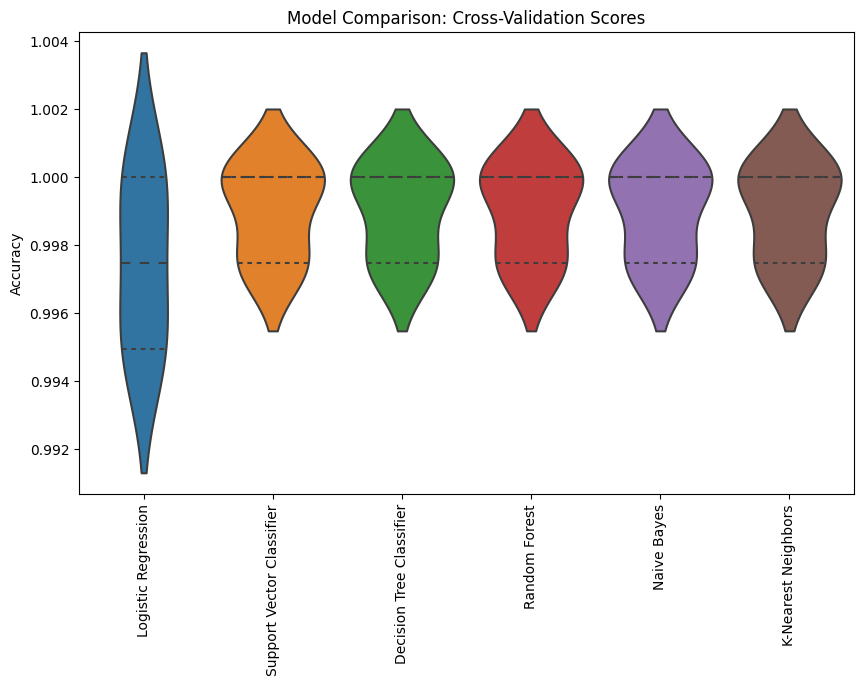

In [35]:
df_scores = pd.DataFrame({"Logistic Regression":lr_scores,'Support Vector Classifier':svc_scores,"Decision Tree Classifier": dt_scores, 'Random Forest': rf_scores,"Naive Bayes":nb_scores,"K-Nearest Neighbors":knn_scores })

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df_scores, inner="quartile")

# Tilt x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Model Comparison: Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.show()


SO THE VIOLIN PLOT SUGGESTS THAT EXCEPT LOGISTIC REGRESSION OTHER MODELS SHOW A NARROW SECTION WHICH DEPICTS THAT THE MODEL STAYS MORE CONSISITENT ACROSS DIFFERENT FOLDS OF DATA THEREFORE BUILDING A MORE CONSISTENT AND ROBUST MODEL

COMPARING THE MEAN ACCURACIES OF ALL MODELS

In [36]:
mean_accuracies = {model: np.mean(df_scores) for model, df_scores in df_scores.items()}
best_model = max(mean_accuracies, key=mean_accuracies.get)

print("Mean Accuracies:")
for model, mean_accuracy in mean_accuracies.items():
    print(f"{model}: {mean_accuracy}")


Mean Accuracies:
Logistic Regression: 0.9974811083123425
Support Vector Classifier: 0.9989924433249371
Decision Tree Classifier: 0.9989924433249371
Random Forest: 0.9989924433249371
Naive Bayes: 0.9989924433249371
K-Nearest Neighbors: 0.9989924433249371


ACTUALLY EXCEPT LOGISTIC REGRESSION ALL OTHERS LOOKS LIKE SAME VALUE

CHECKING OUT THE FEATURE IMPORTANCE OF THE BEST RESULTED MODELS OF ABOVE OUT OF WHICH SVC AND KNN DON'T HAVE FEATURE IMPORTANCE FEATURE SO EXCEPT THAT WE WILL TRY TO FIND OUT THE FEATURE IMPORTANCE OF THE OTHER MODELS

In [39]:


# Assuming best_model is 'Decision Tree'
best_model = DecisionTreeClassifier()
best_model.fit(X_train, y_train)

# Feature importance for Decision Tree
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head())


Top Features:
   Feature  Importance
0     Time    0.573804
2       V2    0.423679
28     V28    0.002518
16     V16    0.000000
27     V27    0.000000


ACCORDING TO DECISION TREE THE TOP 5 FEATURE IMPORTANCE  IS GIVEN TO TIME,V2,V28,V16 AND V27

In [40]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Feature importance for Random Forest
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head())

Top Features:
   Feature  Importance
0     Time    0.185839
2       V2    0.133056
6       V6    0.092337
9       V9    0.059733
14     V14    0.051789


ACCORDING TO RANDOM FOREST CLASSIFIER THE TOP 5 FEATURE IMPORTANCE IS GIVEN TO TIME,V2,V6,V9 AND V14

In [42]:
best_model_nb = GaussianNB()
best_model_nb.fit(X_train, y_train)

# Get the means (average values) for each feature
feature_means = best_model_nb.theta_

# Create a DataFrame to display feature means
feature_means_df = pd.DataFrame({'Feature':['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] , 'Mean': feature_means[0]})
feature_means_df = feature_means_df.sort_values(by='Mean', ascending=False)

# Display the top features based on means
print("Top Features based on Means:")
print(feature_means_df.head())

Top Features based on Means:
   Feature      Mean
2       V2  0.734384
3       V3  0.281513
24     V24  0.066134
15     V15  0.052320
23     V23  0.047939


ACCORDING TO NAIVE BAYES THE TOP 5 FEATURE IMPORTANCE IS GIVEN TO V2,V3,V24, V15 AND V23